In [1]:
from __future__ import print_function

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=False)

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [24]:
# Parameters
learning_rate = 0.1
num_steps = 1000
batch_size = 128
display_step = 100

# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)

mnist.train.images[0]

mnist.train.images.ndim

len(mnist.train.images[0])


784

In [25]:
# Define the input function for training
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.train.images}, y=mnist.train.labels,
    batch_size=batch_size, num_epochs=None, shuffle=True)

mnist.train.labels

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [23]:
# Define the neural network
def neural_net(x_dict):
    # TF Estimator input is a dict, in case of multiple inputs
    x = x_dict['images']
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.layers.dense(x, n_hidden_1)
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.layers.dense(layer_1, n_hidden_2)
    # Output fully connected layer with a neuron for each class
    out_layer = tf.layers.dense(layer_2, num_classes)
    return out_layer

In [24]:
# Define the model function (following TF Estimator Template)
def model_fn(features, labels, mode):
    
    # Build the neural network
    logits = neural_net(features)
    
    # Predictions
    pred_classes = tf.argmax(logits, axis=1)
    pred_probas = tf.nn.softmax(logits)
    
    # If prediction mode, early return
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=pred_classes) 
        
    # Define loss and optimizer
    loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits=logits, labels=tf.cast(labels, dtype=tf.int32)))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss_op, global_step=tf.train.get_global_step())
    
    # Evaluate the accuracy of the model
    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)
    
    # TF Estimators requires to return a EstimatorSpec, that specify
    # the different ops for training, evaluating, ...
    estim_specs = tf.estimator.EstimatorSpec(
      mode=mode,
      predictions=pred_classes,
      loss=loss_op,
      train_op=train_op,
      eval_metric_ops={'accuracy': acc_op})

    return estim_specs

In [25]:
# Build the Estimator
model = tf.estimator.Estimator(model_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Akshata\\AppData\\Local\\Temp\\tmpjx09dhge', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000}


In [26]:
# Train the Model
model.train(input_fn, steps=num_steps)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Akshata\AppData\Local\Temp\tmpjx09dhge\model.ckpt.
INFO:tensorflow:loss = 2.36845, step = 1
INFO:tensorflow:global_step/sec: 118.309
INFO:tensorflow:loss = 0.395947, step = 101 (0.847 sec)
INFO:tensorflow:global_step/sec: 117.959
INFO:tensorflow:loss = 0.446569, step = 201 (0.847 sec)
INFO:tensorflow:global_step/sec: 123.052
INFO:tensorflow:loss = 0.296143, step = 301 (0.813 sec)
INFO:tensorflow:global_step/sec: 117.128
INFO:tensorflow:loss = 0.27256, step = 401 (0.865 sec)
INFO:tensorflow:global_step/sec: 123.971
INFO:tensorflow:loss = 0.194603, step = 501 (0.795 sec)
INFO:tensorflow:global_step/sec: 134.232
INFO:tensorflow:loss = 0.382193, step = 601 (0.745 sec)
INFO:tensorflow:global_step/sec: 108.289
INFO:tensorflow:loss = 0.23163, step = 701 (0.923 sec)
INFO:tensorflow:global_step/sec: 137.849
INFO:tensorflow:loss = 0.360719, step = 801 (0.726 sec)
INFO:tensorflow:global_step/sec: 11

In [27]:
# Evaluate the Model
# Define the input function for evaluating
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.test.images}, y=mnist.test.labels,
    batch_size=batch_size, shuffle=False)
# Use the Estimator 'evaluate' method
model.evaluate(input_fn)

INFO:tensorflow:Starting evaluation at 2017-11-22-15:47:17
INFO:tensorflow:Restoring parameters from C:\Users\Akshata\AppData\Local\Temp\tmpjx09dhge\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2017-11-22-15:47:18
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.914, global_step = 1000, loss = 0.290821


{'accuracy': 0.91399997, 'global_step': 1000, 'loss': 0.29082114}

INFO:tensorflow:Restoring parameters from C:\Users\Akshata\AppData\Local\Temp\tmpjx09dhge\model.ckpt-1000


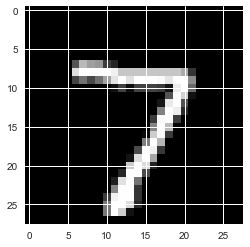

Model prediction: 7


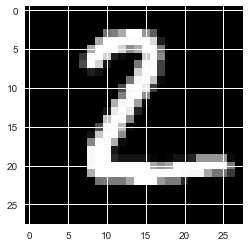

Model prediction: 2


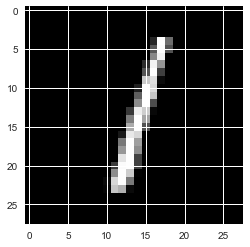

Model prediction: 1


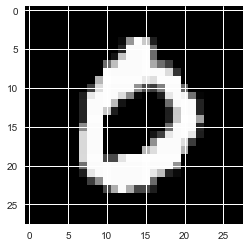

Model prediction: 0


In [28]:
# Predict single images
n_images = 4
# Get images from test set
test_images = mnist.test.images[:n_images]
# Prepare the input data
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': test_images}, shuffle=False)
# Use the model to predict the images class
preds = list(model.predict(input_fn))

# Display
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction:", preds[i])